In [2]:
import numpy as np
import matplotlib.pyplot as plt

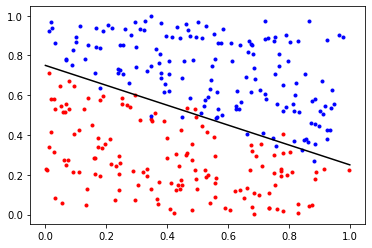

In [25]:
def datagen(n,sigma):
    x = np.random.rand(2,n)
    D = (x[1] + 0.5*x[0] - 0.75)/0.5
    Label = np.where(D > 0 , 1, 0)
    r = np.exp(-(D*D)/(2*(sigma**2)))
    z = np.random.binomial(1,r/2,size=n)
    Faux = np.where(z==1,1,0)
    Label = np.where(z==1,1-Label,Label)
    L1 = (x.T)[(Label==1)]
    L0 = (x.T)[(Label==0)]
    plt.plot(L0[:,0],L0[:,1],'.r')
    plt.plot(L1[:,0],L1[:,1],'.b')
    plt.plot(np.linspace(0,1,100),-0.5*np.linspace(0,1,100)+0.75,'black')
    plt.show()
    return x,Label,Faux

n = 300
X,Label,Faux = datagen(n,sigma = 0.05)

In [26]:
X_plus = np.concatenate((X,[np.ones(len(X[0]))]),axis=0)

Theta = [ 56.6080584  109.09095211 -81.36545077]
n_iter = 1000000


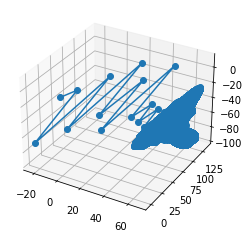

In [27]:

def sgm(x):
  return 1 / (1 + np.exp(-x))


Theta = np.array([0.,0.,0.])
thetas=[Theta]
eta = 0.5
n_iter = 0
n_iter_max = 1000000
grad = 10
while(np.linalg.norm(grad)>1e-8 and n_iter<n_iter_max):
    pred = sgm(X_plus.T@Theta)
    err = pred - Label
    grad = X_plus@err
    Theta = Theta - eta*grad
    n_iter += 1
    thetas.append(Theta)

thetas = np.array(thetas)
print('Theta = ' + str(Theta))
print('n_iter = ' + str(n_iter))


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(thetas[:,0],thetas[:,1],thetas[:,2],'-o')
plt.draw()
    

In [28]:
Lab_est = (np.where(sgm(X_plus.T@Theta)>0.5,1,0).astype(int))
print(Label[:10])
print(Lab_est[:10])
Err=Label-Lab_est
print(len(np.nonzero(Err)[0]))
print(len(np.nonzero(Faux)[0]))

[0 1 0 1 1 0 0 1 0 1]
[0 1 0 1 1 0 0 1 0 1]
10
10
